# Data Science for Humanities 2

## Session: Evaluation & Stastical significance testing

Summer term 23
Prof. Goran Glavaš, Lennart Keller

### Today's plan

- Recap: Classification & Regression
- Annotations: Gold-standard & Inter-annotator agreement
- Evaluation metrics for Classification & Regression
- Statistical significance testing

### Recap: Classification & Regression

#### Classification

**Goal**: Create a model that assigns a single class to each object.

Fθ:→x→N

- F:= Classifier
- →x:= Object-feature vector
- N:= Any encoded class label

**Requirements**:

- Labeled Examples
- A suitable classifier
- (Suitable features)

### Regression

**Goal**: Create a model that predicts a continuous value for each object.

Fθ:→x→R

Requirements:

- Annotated examples
- A suitable regression model
- (Suitable features)

Both classification and regression require annotated examples to train F. They fall into the category of supervised techniques. 

### Gold-standard-annotations & Inter-annotator agreement

In most cases training data for any supervised technique has to be manually annotated by humans.

While, at first glance, this process seems to be straightforward, it can become arbitrarily complex, depending on the problem to solve!

To facilitate the annotation process there are some best practices:

- Creating an annotation guide
- Revising the annotation guide
- Start with a small sample for the initial guide, revise, and then reiterate this process until no further problems arise.
- Regular feedback from annotators to project lead.
- Let multiple annotators work on the same data and measure their agreement
- Use majority vote or expert supervision to handle ambiguous cases


### Annotations in the Computational Humanities

In methodologically oriented fields like classical NLP, the annotation process often (but not always) plays a minor role because the overall goal is to develop new methods that push the performance across various use-cases or datasets.

In fields like Computational Humanities, which employ data-science methods to answer research questions about certain objects, annotations are much more important because they serve a critical (two-folded) role.

Since CH research questions are often based on assumptions made by qualitative work or vague theories, converting them into an annotation scheme is complex.

While creating annotations, you must reason about your object of interest and the questions you are working on, forcing you to precisely specify your investigation's phenomena.

Example: Labeling depiction of violence in German Dime-novels.

**How can violence be defined?**

    Er zog jetzt irgendetwas unter seiner Kleidung hervor. Brenda konnte es nicht genau sehen. Aber im nächsten Moment blitzte das Mündungsfeuer einer Waffe auf. Die Kugel traf Brenda mitten in die Brust. Sie stützte sich noch auf den Kotflügel ihres Wagens, ehe sie zusammenbrach und regungslos auf dem nassen Boden liegen blieb.

    Mit brachialer Gewalt krachte der Meteorit in den Schutzschild ! Das Shuttle wurde durchgerüttelt , die Energiekonverter summten wie ein zorniger Bienenschwarm . Metall kreischte und schien sich zu verbiegen , während eine Serie greller Leuchterscheinungen vor dem Cockpit aufflackerte.


### Inter-annotator agreement

If multiple annotators annotate the same examples, the inter-annotator agreement measures how reliable the annotators reach the same conclusion.

Thus it is also an estimate of the difficulty of the annotations task.

The inter-annotator agreement can also be viewed as an upper bound for the performance of any machine learning algorithm since "super-human" performance is rarely (if ever) realistic.

To measure the agreement, multiple metrics have been proposed.
Cohens Kappa - Measuring class-based annotations

Measures the agreement of two annotators A1
and A2 on N instances with C classes.



### Cohens Kappa - Measuring class-based annotations

Measures the agreement of two annotators A1
and A2 on N instances with C classes.

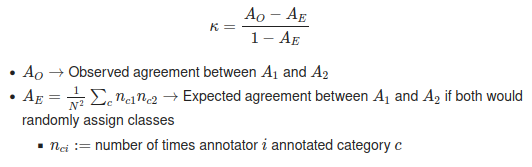


### Cohens Kappa -

Cohens Kappa is measures class-based agreement between two annotators A1
and A2 on N instances each being assigned one of C class labels by both.

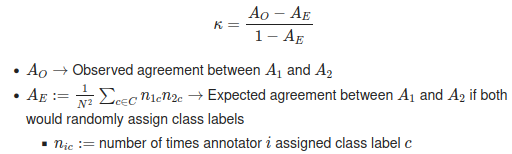

### Cohens Kappa - Example

In [10]:
import pandas as pd
import numpy as np

contingency_table = pd.DataFrame(
    data=[
        [10, 10, 0],
        [5, 45, 10],
        [1, 4, 15]
    ],
    index=[f"A1_C{c}" for c in range(1, 4)],
    columns=[f"A2_C{c}" for c in range(1, 4)],
)
contingency_table

,A2_C1,A2_C2,A2_C3
A1_C1,10,10,0
A1_C2,5,45,10
A1_C3,1,4,15


In [11]:
def expected_agreement(contingency_table: pd.DataFrame, verbose: bool = True) -> float:
    a1_c_counts = contingency_table.sum(axis=1)
    if verbose: print(f"A1 class frequencies:\n{a1_c_counts}")
    a2_c_counts = contingency_table.sum(axis=0)
    if verbose: print(f"A2 class frequencies:\n{a2_c_counts}")
      
    n_instances = contingency_table.values.sum()
    a_e = (1 / n_instances**2) * (a1_c_counts.values * a2_c_counts.values).sum()
    if verbose: print(f"Expected agreement is {a_e}")
    return a_e

def observed_agreement(contingency_table, verbose: bool = True):
    a_o = np.diag(contingency_table).sum() / contingency_table.values.sum() #Why np.diag()? The numpy.diag() function creates a diagonal matrix or extracts the diagonal elements of a matrix. It can also construct a diagonal array from a one-dimensional array.
    if verbose: print(f"Observed agreement is {a_o}")
    return a_o

def cohens_kappa(contingency_table: pd.DataFrame, verbose: bool = True) -> float:
    a_o = observed_agreement(contingency_table=contingency_table, verbose=verbose)
    a_e = expected_agreement(contingency_table=contingency_table, verbose=verbose)
    agreement = (a_o - a_e) / (1 - a_e)
    return agreement

In [13]:
cohens_kappa(contingency_table)

Observed agreement is 0.7
A1 class frequencies:
A1_C1    20
A1_C2    60
A1_C3    20
dtype: int64
A2 class frequencies:
A2_C1    16
A2_C2    59
A2_C3    25
dtype: int64
Expected agreement is 0.436


0.4680851063829786

### Gold-standard annotations

If multiple annotators annotate data without reaching a perfect agreement, how do we handle the disagreement cases to create a definitive gold-standard version of our dataset?

Options:

1. Discard all disagreement cases
2. Let another annotator with more knowledge (expert) reassess those cases.
3. Use majority-vote to automatically correct those cases.


Literature

- Rapp, Andrea (2016): Manuelle und automatische Annotation. In: Digital Humanities. Eine Einführung.
- Reiter and Konle (2022): Messverfahren zum Inter-annotator-agreement (IAA). Eine Übersicht.



### Evaluation

Suppose we have created or obtained a gold-standard dataset and trained a model on it.

How do we asses the model's performance?

#### Evaluation metrics for

- Classification: Accuracy, Precision, Recall, F1-Score
- Regression: Mean-Squared-Error, Mean-Absolute-Error, Root-Mean-Squared-Error

#### Prerequisite - Data for training and testing?

To assess the model's performance, we must test it on data it hasn't seen during training!

To create this, we can either:

- Split your data in into two parts, one for training and one for testing
- Use cross-validation

#### Prerequisite - Train-test-split

Split your dataset in two parts.

Usually, the larger split is used to train the model, and the smaller one for testing it.

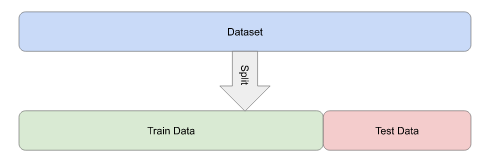

#### Prerequisite - K-Fold Cross-Validation

The single train-test-split strategy has an obvious downside, by chance, you can end up with a random split that is not representative of the whole dataset (too simple, too hard, not containing all labels in case of label imbalance, or extreme multiclass settings)

K

-Fold Cross-Validation offers to reliable estimate the true model's performance, albeit at higher computational costs.

The process is simple: The dataset is split into K
equally sized splits and K

different models are trained by successively selecting one split as test-set and training on all other splits.

To obtain final results, you can average the scores over all splits.

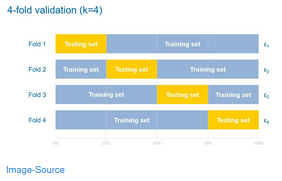


#### Prerequisite - Confusion Matrix
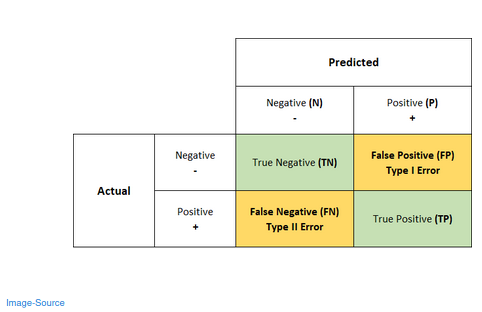

#### Classification - Accuracy

Accuracy is the simplest way to measure the quality of a classification model.

It computes the amount of correct decisions:
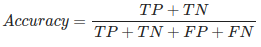


**Problem with accuracy**

Accuracy is a global measure that doesn't consider class distributions.
It can be heavily affected in imbalanced cases.


#### Label imbalance - Example

Suppose we have a dataset containing some health features for a large group of patients; we want to classify whether a patient has cancer.

Luckily, most people do not have cancer, so our chance to encounter patients with cancer is small.

The resulting dataset might look similar to this:

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Generate some mock data (we actually don't need those features)
X = np.random.randn(10_000, 100)

# 0 => No Cancer, 1 => Cancer
y = np.random.choice(2, p=(0.99, 0.01), size=(10_000)) #no cancer: 0.99 vs. cancer: 0.01
print(np.unique(y, return_counts=True)) #The numpy.unique() function is used to find the unique elements of an array.Returns the sorted unique elements of an array.

# Generate train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(array([0, 1]), array([9894,  106], dtype=int64))


In [15]:
# Build a "classifier" and use it to predict our data.
from sklearn.base import BaseEstimator

class LazyClassifier(BaseEstimator):
    def fit(self, X, y): #why do we need all this unique_labels stuff?
        unique_labels, counts = np.unique(y, return_counts=True) #unique_labels: extract an ordered array of unique labels
        self.most_common_label_ = unique_labels[np.argmax(counts)] #Returns the indices of the maximum values along an axis.
        return self
    def predict(self, X, y=None):
        return np.full(X.shape[0], fill_value=self.most_common_label_)

clf = LazyClassifier().fit(X_train, y_test)
y_pred = clf.predict(X_test)

In [16]:
# Compute the accuracy 
def accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return (y_true == y_pred).astype("int").mean().item()

In [17]:
print(f"The classifier obtained an accuracy of {accuracy(y_test, y_pred)}")

The classifier obtained an accuracy of 0.9873333333333333


#### Label imbalance and accuracy - conclusion

Accuracy can be useful for rating a model's performance, but only if classes are roughly uniformly distributed.

Another downside of this metric is its inability to differentiate the performance between classes.


### Precision and Recall

To more accurately describe a model's performance, we can express its performance in two terms:

- Precision: How precise is a model when predicting a class?
- Recall: How good can a model retrieve all instances of a class?
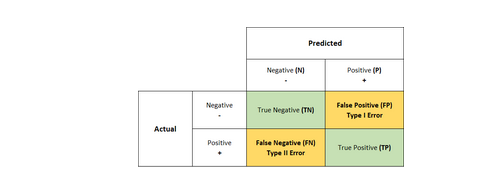
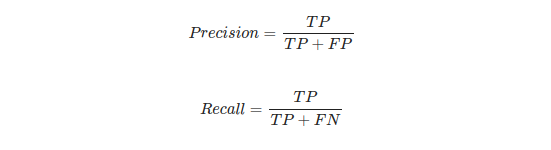

### F1 Measure

To jointly express both precision and recall, we can aggregate them into a single score using the harmonic mean:
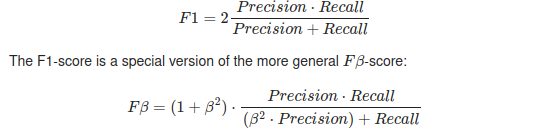

### Evaluation: Moving from binary- to multi-class settings

So far, we only considered binary settings, which makes it easier because errors in class directly affect the only other class.

In multiclass settings, things can become a little bit more tricky because we have to compute precision and recall for each class individually.

Thankfully, we can use scikit-learn to handle the groundwork for us.


In [23]:
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.linear_model import LogisticRegression

train_data = fetch_20newsgroups_vectorized(subset="train")
test_data = fetch_20newsgroups_vectorized(subset="test")

train_target_names = np.array(train_data.target_names)
X_train = train_data.data
y_train = train_target_names[train_data.target]
#shorter than X_train= and y_train=
#X_train, y_train = train_data.data, train_target_names[train_data.target]

test_target_names = np.array(test_data.target_names)
X_test, y_test = test_data.data, test_target_names[test_data.target]


clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.63      0.61      0.62       319
           comp.graphics       0.62      0.69      0.66       389
 comp.os.ms-windows.misc       0.72      0.65      0.68       394
comp.sys.ibm.pc.hardware       0.68      0.63      0.66       392
   comp.sys.mac.hardware       0.72      0.71      0.71       385
          comp.windows.x       0.72      0.68      0.70       395
            misc.forsale       0.74      0.85      0.79       390
               rec.autos       0.80      0.79      0.79       396
         rec.motorcycles       0.80      0.87      0.83       398
      rec.sport.baseball       0.70      0.82      0.75       397
        rec.sport.hockey       0.88      0.87      0.87       399
               sci.crypt       0.87      0.79      0.83       396
         sci.electronics       0.63      0.63      0.63       393
                 sci.med       0.67      0.63      0.65       396
         

<Axes: >

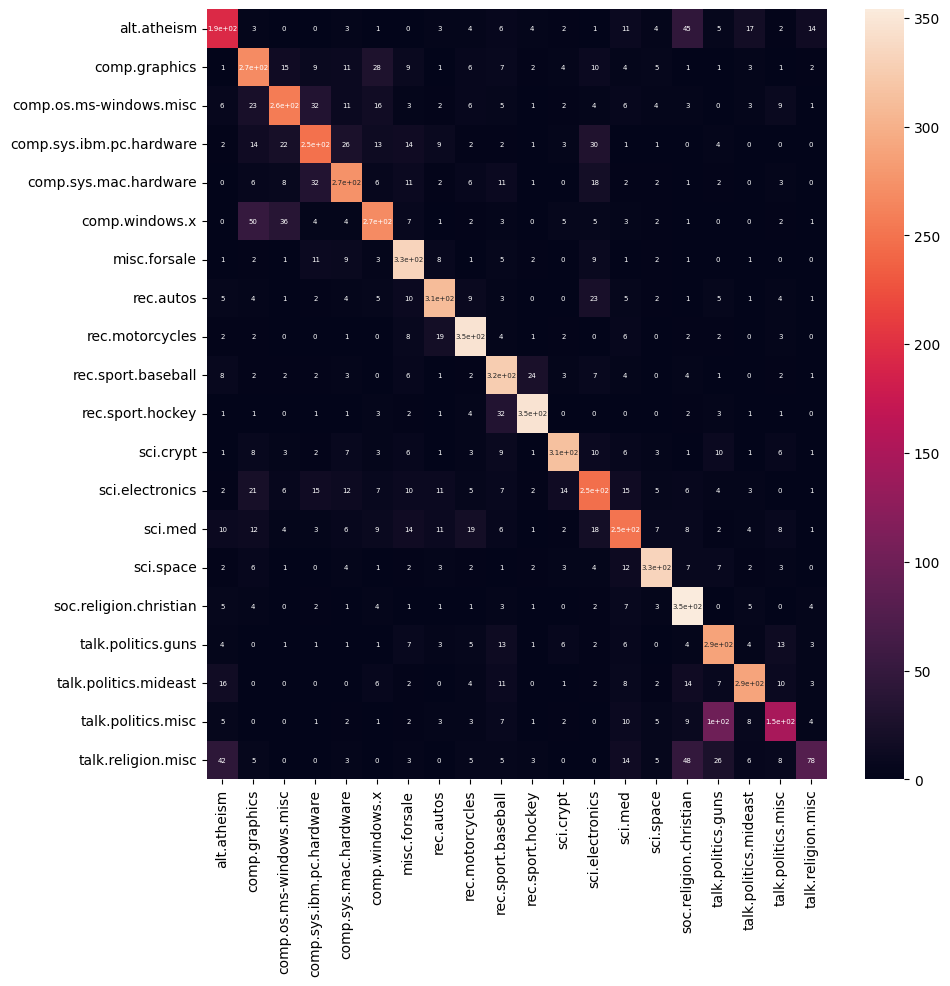

In [24]:
from sklearn.metrics import confusion_matrix

conf_mat = pd.DataFrame(data=confusion_matrix(y_true=y_test, y_pred=y_pred), index=test_target_names, columns=test_target_names)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(conf_mat, annot=True, annot_kws={'size': 5}, ax=ax)

### Regression - Mean Squared Error

To measure the quality of a regression model, we can't compute the number of discrete overlaps.

Instead, we need to base our judgement on the amount of error a model makes.
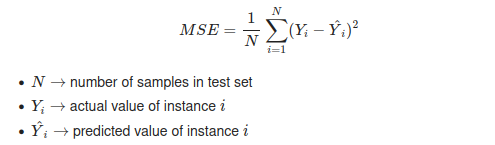


### Regression - Mean Absolute Error
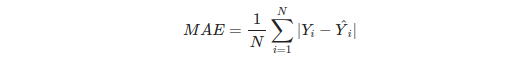


### Regression - Root Mean Squared Error
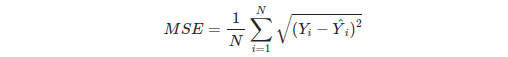


### Regression - Why three different metrics?

All three metrics measure the differences between the actual and predicted values.

Why do we need them? What are the differences?

→ They all provide a different perspective in the distribution of the offsets!

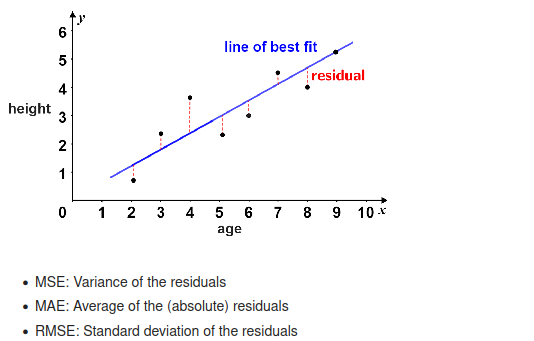

## Statistical significance testing - Introduction

Suppose you have developed two new classifiers to improve text classification.

You chose the best existing classifier as a baseline to test the performance of your two new models.

To them, you train all classifiers on your benchmark dataset using 5fold-cross-validation and average the f1-macro score over all results.

For simplicity, we generate the data:


In [25]:
def generate_data(n_samples): #n_samples=100 changed to n_samples
    
    #loc=mean_of_values, scale=standard deviation from the mean values
    sample_baseline = np.random.normal(loc=0.70, scale=0.01, size=n_samples)
    sample_new_a = np.random.normal(loc=0.702, scale=0.01, size=n_samples)
    sample_new_b = np.random.normal(loc=0.71, scale=0.01, size=n_samples)

    df = pd.DataFrame({
        "seed": list(range(n_samples)),
        "score_baseline": sample_baseline,
        "score_new_model_a": sample_new_a,
        "score_new_model_b": sample_new_b,
    })
    return df

df = generate_data(100)
df.head()

,seed,score_baseline,score_new_model_a,score_new_model_b
0,0,0.697800,0.698950,0.711911
1,1,0.697652,0.700998,0.714526
2,2,0.707310,0.718712,0.705624
3,3,0.689949,0.692404,0.714525
4,4,0.710362,0.718426,0.728497


<Axes: xlabel='score', ylabel='Count'>

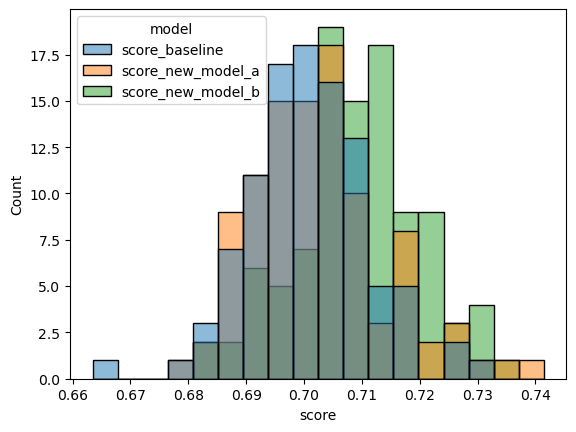

In [15]:
# Lets plot the score distribution, 
sns.histplot(x="score", hue="model", data=df.melt(id_vars="seed", var_name="model", value_name="score"))

Visually, we can infer that new_model_b outperforms the baseline, while new_model_a seems only slightly better.

But how can we test this assumption, and express its validity numerically?

### Significance testing - Basics I

Significance testing is a statistical method used to determine if the results of a study or experiment are statistically significant, meaning that they are unlikely to have occurred by chance alone.

The goal is to assess whether the observed differences or relationships between variables are real and not simply due to random variation.

The process involves comparing the observed data to an expected distribution under a null hypothesis (H0

), which assumes no true effect or relationship exists in the population being studied.

If the observed data significantly deviates from what we would expect under the null hypothesis, it suggests that the observed effect or relationship is statistically significant.

Significance is typically measured using a p-value, representing the probability of observing the data or more extreme results under the null hypothesis.

If the p-value is below the chosen threshold, the null hypothesis is rejected, and it is concluded that there is evidence of a statistically significant effect or relationship.

Typically the p-value threshold is set to 0.05


### Significance testing - Basics II

Depending on the type or distribution of the data to test, you have to chose a suitable test.

There are two broad types of tests:

**Non-parametric test***: Non-parametric tests do not assume that your data is distributed in a specific way, and can thus be employed more flexibly.

**Parametric tests**

These tests assume that your data follows a certain distribution (often the normal distribution), and use the distributions' properties (→

parameters (like mean, variance, etc.)) to compute significance.

These assumptions make them more expressive and reliable compared to non-parametric tests.


### Significance testing - Parametric test: Student's T-Test

The Student's T-Test is used to check if populations have deviating means.

The T-test assumes that the two samples from both populations are normally distributed and have similar variance.

The T-Test comes in three different versions:

    One sample test: Tests if the mean of a single population is different from the mean specified in the null-hypothesis.
        Example: The scores of my model have an average of 80%
    Two sample test (Student's T-test): Test if the means of two populations are equal (H0

    )
        Example: Do my model's on average perform the same.
    Paired two sample test: Tests if the mean of the same population is the same after a certain event occured.
        Example: Drinking alcohol has no influence on the heart-rate of young adults.

Student's T-Test: Which side do you chose?

We chose two strategies while employing the test:
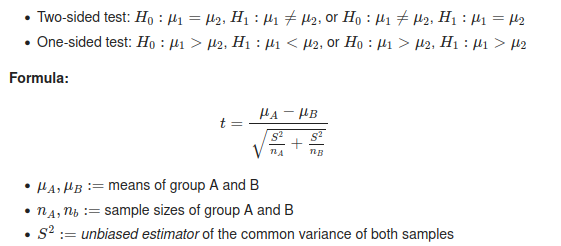

The resulting value t is called test-statistic-value and can be used to compute the significance pvalue α used to accept or reject the null-hypothesis. It represents how many standard errors lie between the mean of group A and group B.

In practice, we just use a predefined function to compute the test:

In [26]:
from scipy.stats import ttest_ind

print(f"Baseline->NewModelA (Two-sided) {ttest_ind(df['score_baseline'], df['score_new_model_a'])}")
print(f"Baseline->NewModelA (One-sided: Left mean is less) {ttest_ind(df['score_baseline'], df['score_new_model_a'], alternative='less')}")
print()
print(f"Baseline->NewModelB (Two-sided) {ttest_ind(df['score_baseline'], df['score_new_model_b'])}")
print(f"Baseline->NewModelB (One-sided: Left mean is less) {ttest_ind(df['score_baseline'], df['score_new_model_b'], alternative='less')}")

Baseline->NewModelA (Two-sided) Ttest_indResult(statistic=-1.1836442539095615, pvalue=0.23797301780102723)
Baseline->NewModelA (One-sided: Left mean is less) Ttest_indResult(statistic=-1.1836442539095615, pvalue=0.11898650890051361)

Baseline->NewModelB (Two-sided) Ttest_indResult(statistic=-5.663557586242623, pvalue=5.164301672175342e-08)
Baseline->NewModelB (One-sided: Left mean is less) Ttest_indResult(statistic=-5.663557586242623, pvalue=2.582150836087671e-08)


Bases on the test-results, the performance of new_model_a would be classified as being on average on par with the baseline. The second one-sided tests also confirms that new_model_a on average is not better than the baseline.

Based, on both test for new_model_b, it would be viewed as both deviating, and performing better than the baseline.

## T-test: Influence of the sample size

In this scenario, we manually generated the data, and can safely assume that the means of the distributions generating the results for the baseline and new_model_a are not the same.

Still, the T-test contradicts this.

This points out one of the weaknesses of most significance tests, there results heavily rely on the sample size.

Let's increase the number of "runs" for our experiment:


<Axes: xlabel='score', ylabel='Count'>

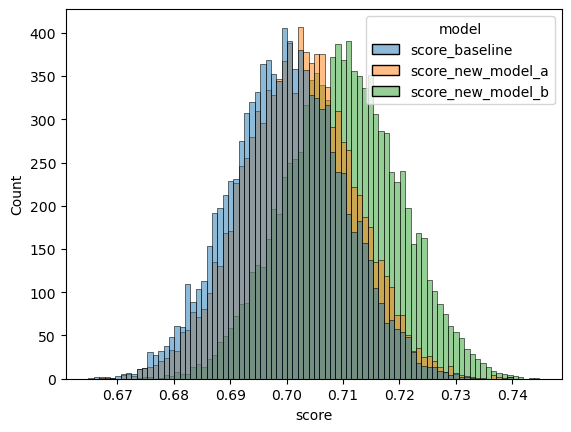

In [17]:
df_large = generate_data(10_000)
sns.histplot(x="score", hue="model", data=df_large.melt(id_vars="seed", var_name="model", value_name="score"))

Now, if we re-run the test on this larger dataset, the tests return different results:

In [18]:
print(f"Baseline->NewModelA (Two-sided) {ttest_ind(df_large['score_baseline'], df_large['score_new_model_a'])}")
print(f"Baseline->NewModelA (One-sided: Left mean is less) {ttest_ind(df_large['score_baseline'], df_large['score_new_model_a'], alternative='less')}")
print()
print(f"Baseline->NewModelB (Two-sided) {ttest_ind(df_large['score_baseline'], df_large['score_new_model_b'])}")
print(f"Baseline->NewModelB (One-sided: Left mean is less) {ttest_ind(df_large['score_baseline'], df_large['score_new_model_b'], alternative='less')}")

Baseline->NewModelA (Two-sided) Ttest_indResult(statistic=-14.47541201495311, pvalue=3.004281497267246e-47)
Baseline->NewModelA (One-sided: Left mean is less) Ttest_indResult(statistic=-14.47541201495311, pvalue=1.502140748633623e-47)

Baseline->NewModelB (Two-sided) Ttest_indResult(statistic=-69.75427850602864, pvalue=0.0)
Baseline->NewModelB (One-sided: Left mean is less) Ttest_indResult(statistic=-69.75427850602864, pvalue=0.0)


Both models would be rated as clearly outperforming the baseline, albeit on different levels.

So, to reliably test our data, we need to make sure to have enough samples!

### Non-parametric tests

Sometimes, we can't infer how our samples are distributed.

In these cases, we can use non-parametric tests to test if certain properties of the samples significantly differ.


### Non-parametric tests - Wilcoxon signed-rank test

The Wilkcoxon test can be used to check if the central tendencys of two populations are equal or different. It is based on the ranks of absolute differences between two pairs of values from each sample (|xj1−xj2|) Like the Student's T-Test it comes in different version:
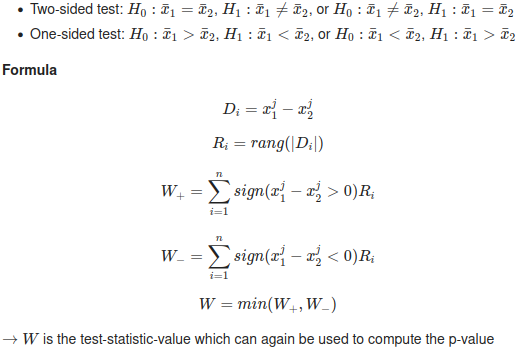

We used the same data, as example for the Wilcoxon test:

In [19]:
from scipy.stats import wilcoxon

print(f"Baseline->NewModelA (Two-sided) {wilcoxon(df_large['score_baseline'], df_large['score_new_model_a'])}")
print(f"Baseline->NewModelA (One-sided: Left mean is less) {ttest_ind(df_large['score_baseline'], df_large['score_new_model_a'], alternative='less')}")
print()
print(f"Baseline->NewModelB (Two-sided) {wilcoxon(df_large['score_baseline'], df_large['score_new_model_b'])}")
print(f"Baseline->NewModelB (One-sided: Left mean is less) {ttest_ind(df_large['score_baseline'], df_large['score_new_model_b'], alternative='less')}")

Baseline->NewModelA (Two-sided) WilcoxonResult(statistic=20836232.0, pvalue=3.2885594110579395e-47)
Baseline->NewModelA (One-sided: Left mean is less) Ttest_indResult(statistic=-14.47541201495311, pvalue=1.502140748633623e-47)

Baseline->NewModelB (Two-sided) WilcoxonResult(statistic=8080701.0, pvalue=0.0)
Baseline->NewModelB (One-sided: Left mean is less) Ttest_indResult(statistic=-69.75427850602864, pvalue=0.0)
